In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Funciones

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Prediccion {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [43]:
datos=pd.read_csv("wheat.csv")

In [44]:
datos

,area,perimeter,compactness,length,width,asymmetry coefficient,groove length,category
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


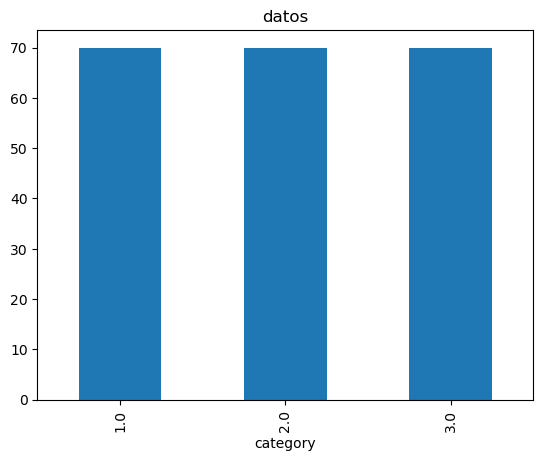

In [45]:
datos["category"].value_counts().plot(kind='bar', title='datos')
plt.savefig('distribucionT.eps', format='eps')


# ELIMINAR LINEAL DEPENDIENTES

<Axes: >

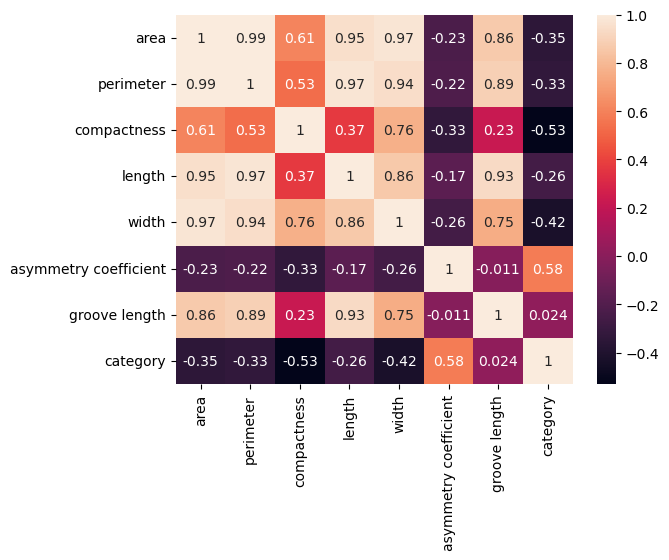

In [46]:
import seaborn as sns
sns.heatmap(datos.corr(),annot=True)
#plt.savefig('corrT.eps', format='eps')

In [47]:
eliminar=['area','length','width']

In [48]:
datos=datos.drop(eliminar,axis=1)

In [49]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


<Axes: >

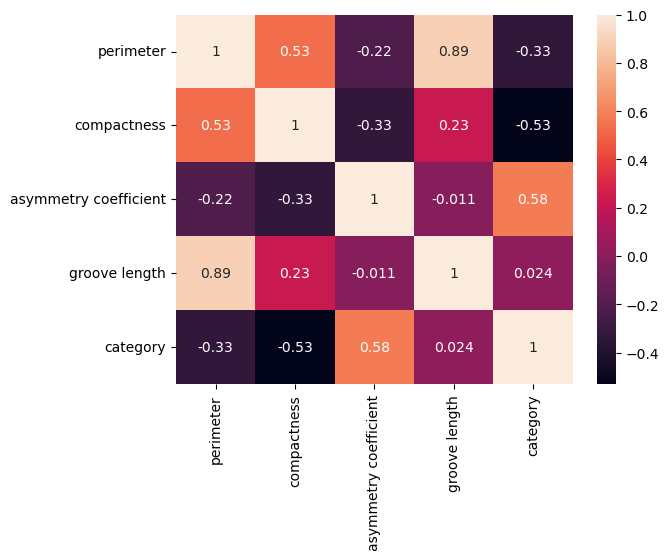

In [50]:
sns.heatmap(datos.corr(),annot=True)
#plt.savefig('corrT2.eps', format='eps')

c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


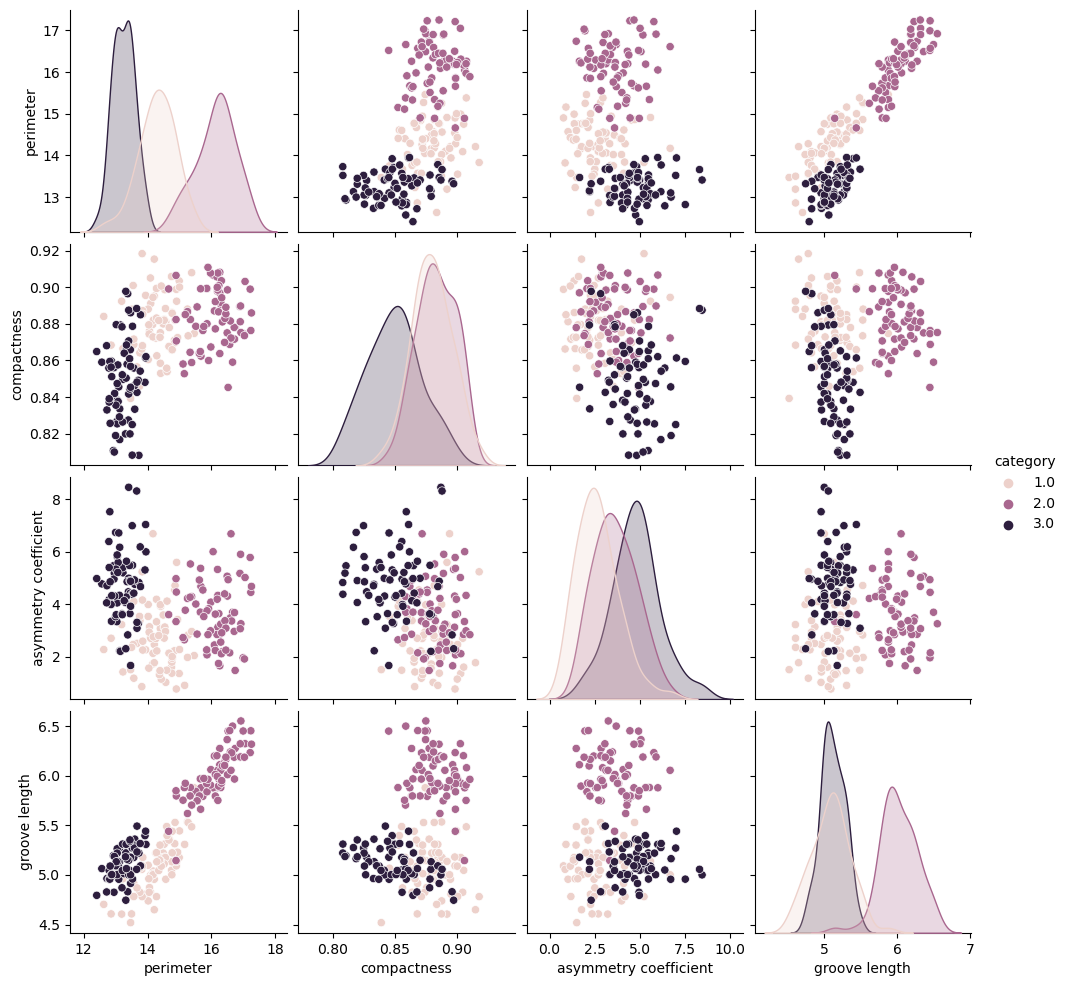

In [51]:
sns.pairplot(datos,hue='category')
plt.savefig('pairplotT.eps', format='eps')

# NORMALIZACION(PENDIENTE)

In [52]:
datos

,perimeter,compactness,asymmetry coefficient,groove length,category
0,14.84,0.8710,2.221,5.220,1.0
1,14.57,0.8811,1.018,4.956,1.0
2,14.09,0.9050,2.699,4.825,1.0
3,13.94,0.8955,2.259,4.805,1.0
4,14.99,0.9034,1.355,5.175,1.0
...,...,...,...,...,...
205,13.20,0.8783,3.631,4.870,3.0
206,12.88,0.8511,4.325,5.003,3.0
207,13.66,0.8883,8.315,5.056,3.0
208,13.21,0.8521,3.598,5.044,3.0


In [53]:
from sklearn.preprocessing import normalize

normalized_data = normalize(datos, axis=0)
datosN = pd.DataFrame(normalized_data, columns=datos.columns)


In [54]:

X = datos.drop("category", axis = 1)
Y = datos['category']

In [55]:
mean = X.mean(axis=0)
std = X.std(axis=0)
dataN = (X - mean) / std
X=dataN

In [56]:
from sklearn.utils import shuffle

In [57]:
# Supongamos que 'X' es tu conjunto de características y 'y' es tu conjunto de etiquetas

# Agrega ruido gaussiano a las características
X_perturbed = X + np.random.normal(0, 0.1, X.shape)

# Combina los datos originales con los perturbados
X_extended = np.vstack((X, X_perturbed))
y_extended = np.concatenate((Y, Y))

# Mezcla los datos para evitar patrones
X_extended, y_extended = shuffle(X_extended, y_extended)



### DIVISION DATOS 80/20

In [58]:

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_extended,y_extended, test_size=0.3, random_state=42)

# RANDOM FOREST

In [59]:
from sklearn.ensemble import RandomForestClassifier

r_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
r_classifier.fit(X_train, y_train)
y_pred = r_classifier.predict(X_val)

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)

best_params = best_model.get_params
best_params

c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-packag

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)>

In [61]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 300}

### MATRIZ CONFUSION 1

<Axes: title={'center': 'Validacion'}>

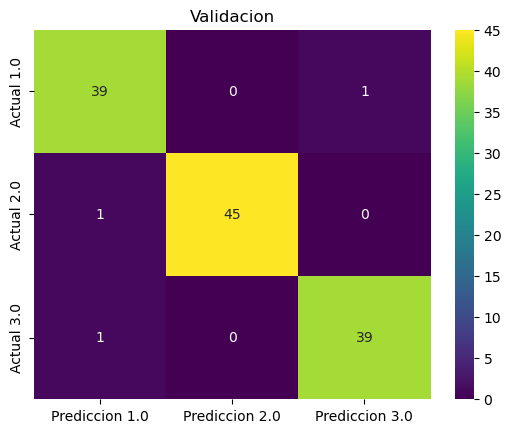

In [62]:
plot(y_val,y_pred_prueba,'Validacion')
# plt.savefig('mejorForestV.eps', format='eps')


In [64]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9841269841269841
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97        40
         2.0       1.00      0.98      0.99        46
         3.0       0.98      1.00      0.99        40

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



Precisión del modelo BaggingClassifier: 0.9682539682539683


<Axes: title={'center': 'Validacion'}>

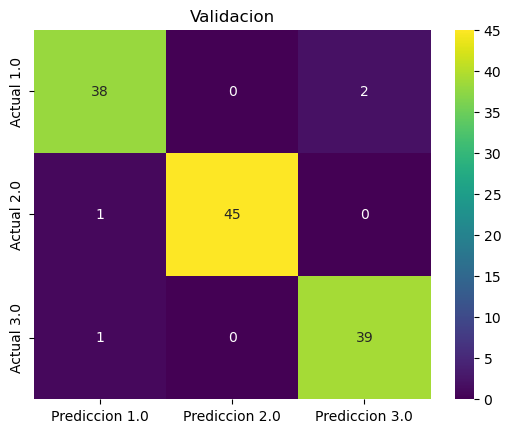

In [65]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')


Precisión del modelo AdaBoost: 0.9761904761904762


<Axes: title={'center': 'Validacion'}>

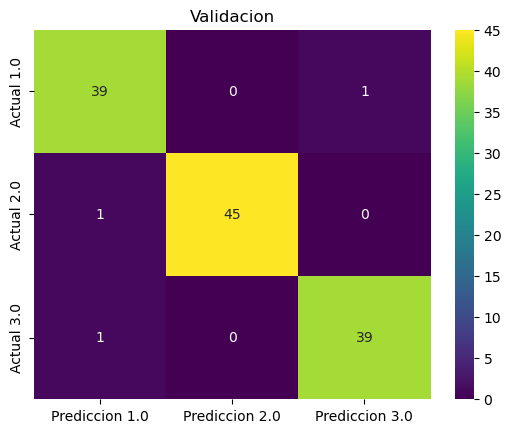

In [66]:
base_classifier = best_model
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_val)
accuracy_AdaBoost = accuracy_score(y_val, y_pred_adaboost )
print(f"Precisión del modelo AdaBoost: {accuracy_AdaBoost}")
plot(y_val,y_pred_adaboost,'Validacion')

# K-NN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)


In [68]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_train_prueba2 = best_model.predict(X_train)

best_params = grid_search.best_params_
best_params


In [69]:
best_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(leaf_size=10, n_neighbors=1)>

<Axes: title={'center': 'Validacion'}>

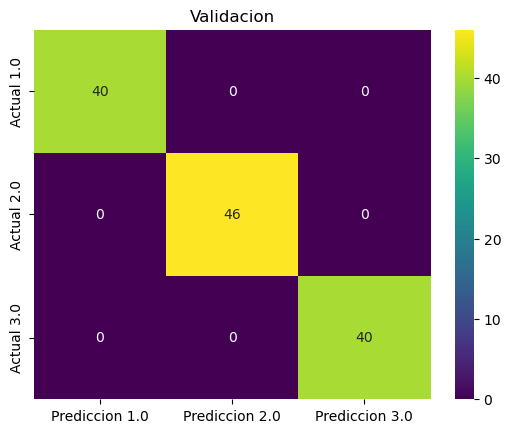

In [70]:
plot(y_val,y_pred_prueba2,"Validacion")
#plt.savefig('mejorkmeansV.eps', format='eps')

<Axes: title={'center': 'Entrenamiento'}>

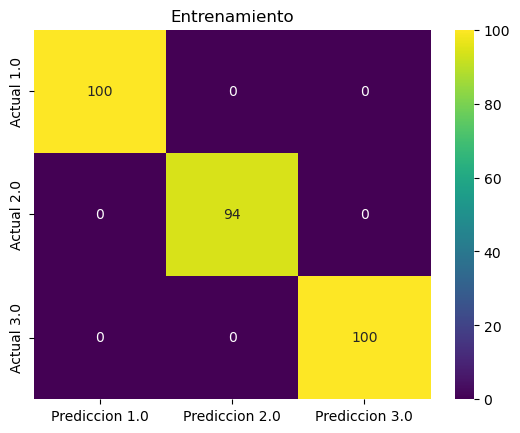

In [99]:
plot(y_train,y_train_prueba2,"Entrenamiento")

In [71]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 1.0
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        40
         2.0       1.00      1.00      1.00        46
         3.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



Precisión del modelo BaggingClassifier: 0.9920634920634921


<Axes: title={'center': 'Validacion'}>

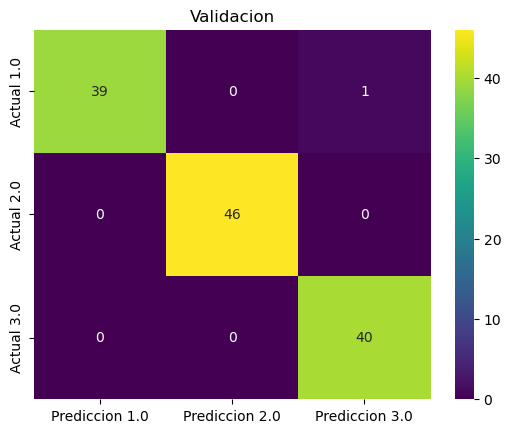

In [72]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

# Arboles de decision

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [74]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba3 = best_model.predict(X_val)
y_train_prueba3 = best_model.predict(X_train)

best_params = best_model.get_params


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-pac

In [75]:
best_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='log_loss', max_depth=20, max_features='sqrt')>

<Axes: title={'center': 'Validacion'}>

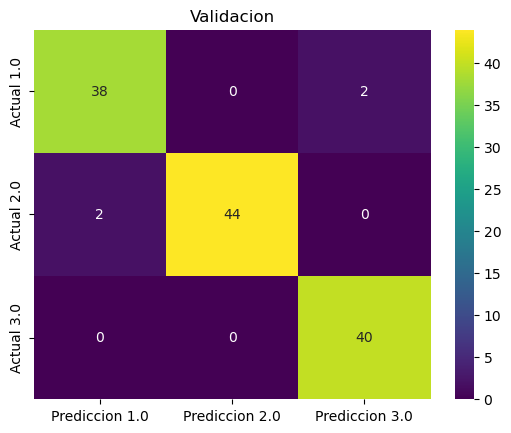

In [97]:
plot(y_val,y_pred_prueba3,"Validacion")
#plt.savefig('mejorArbolV.eps', format='eps')

In [78]:
resultadosModelo(y_val, y_pred_prueba3)

Precisión: 0.9682539682539683
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95        40
         2.0       1.00      0.96      0.98        46
         3.0       0.95      1.00      0.98        40

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



Precisión del modelo BaggingClassifier: 0.9761904761904762


<Axes: title={'center': 'Validacion'}>

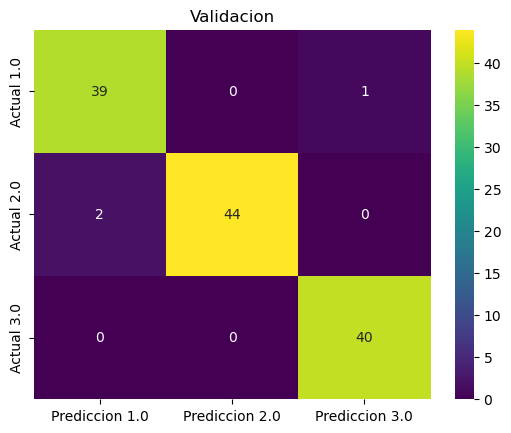

In [79]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

Precisión del modelo AdaBoost: 0.9523809523809523


<Axes: title={'center': 'Validacion'}>

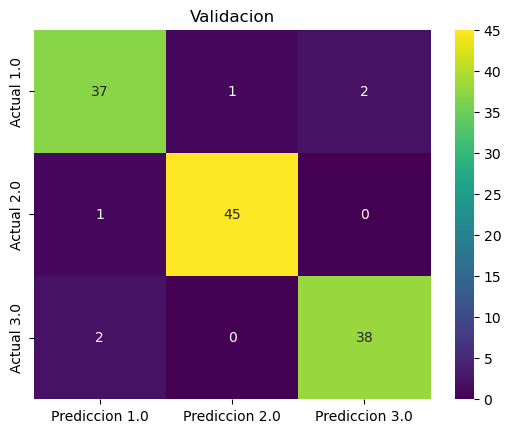

In [80]:
base_classifier = best_model
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_val)
accuracy_AdaBoost = accuracy_score(y_val, y_pred_adaboost )
print(f"Precisión del modelo AdaBoost: {accuracy_AdaBoost}")
plot(y_val,y_pred_adaboost,'Validacion')

# SVM

In [81]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=0.01)
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

In [82]:
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [0.001,0.01,0.1,1,10]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba4 = best_model.predict(X_val)
y_train_prueba4 = best_model.predict(X_train)

best_params = best_model.get_params


c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\andre\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\andre\anaconda3\Lib\site-pack

In [83]:
best_params=grid_search.best_params_

best_params

{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

<Axes: title={'center': 'Validacion'}>

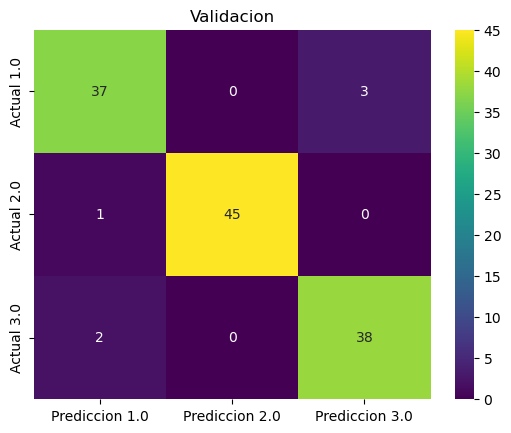

In [84]:
plot(y_val,y_pred_prueba4,"Validacion")
#plt.savefig('mejorSVMV.eps', format='eps')

In [85]:
resultadosModelo(y_val, y_pred_prueba4)

Precisión: 0.9523809523809523
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93        40
         2.0       1.00      0.98      0.99        46
         3.0       0.93      0.95      0.94        40

    accuracy                           0.95       126
   macro avg       0.95      0.95      0.95       126
weighted avg       0.95      0.95      0.95       126



Precisión del modelo BaggingClassifier: 0.9523809523809523


<Axes: title={'center': 'Validacion'}>

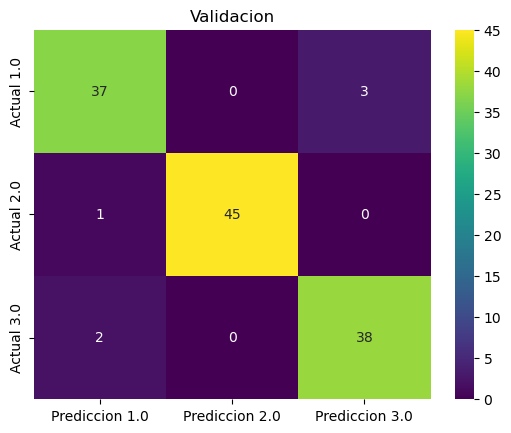

In [86]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

# MLP

In [87]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(160,320,160),activation= 'tanh', max_iter=10000,alpha= 0.0001,learning_rate='constant',
 solver= 'lbfgs')
mlp.fit(X_train, y_train)


MLPClassifier(activation='tanh', hidden_layer_sizes=(160, 320, 160),
              max_iter=10000, solver='lbfgs')

In [88]:
y_pred5 = mlp.predict(X_val)
y_train5 = mlp.predict(X_train)

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(90,60,90), (60,30,60),(60,60)],
    'learning_rate':['constant', 'invscaling', 'adaptive'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=10000),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_val)
y_train5 = best_model.predict(X_train)
best_params = grid_search.best_params_
# Fit the grid search to the training data


In [90]:
best_params

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (60, 30, 60),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

<Axes: title={'center': 'Validacion'}>

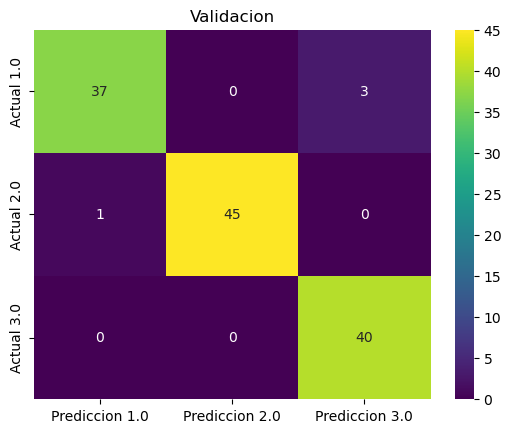

In [91]:
plot(y_val,y_pred,'Validacion')
#plt.savefig('mejorMLPV.eps', format='eps')

In [92]:
resultadosModelo(y_val, y_pred)

Precisión: 0.9682539682539683
Informe de Clasificación:

              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        40
         2.0       1.00      0.98      0.99        46
         3.0       0.93      1.00      0.96        40

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



Precisión del modelo BaggingClassifier: 0.9603174603174603


<Axes: title={'center': 'Validacion'}>

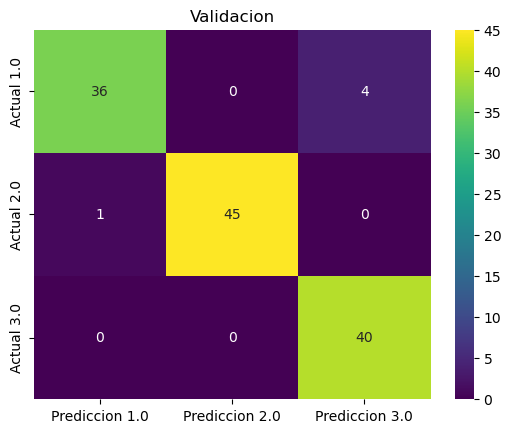

In [93]:
base_classifier = best_model
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f"Precisión del modelo BaggingClassifier: {accuracy_bagging}")
plot(y_val,y_pred_bagging,'Validacion')

In [95]:
base_classifiers = [
    ('rf', RandomForestClassifier(criterion= "gini",max_depth= 5,max_features= 'sqrt',n_estimators= 300)),
    ('kn', KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=1,p=1,weights='uniform')),
    ('sv', SVC(C=10,degree=1,gamma='scale',kernel='linear')),
    ('ml', MLPClassifier(hidden_layer_sizes=(60,30,60), max_iter=10000,activation='relu',alpha= 0.01,
                         learning_rate= 'adaptive',solver='adam')),
    ('dt', DecisionTreeClassifier(criterion='log_loss', max_depth=20, max_features='sqrt') )
]
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(), cv=5)
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_val)
accuracy1 = accuracy_score(y_val, y_pred_stacking )
print(f"Precisión del modelo Stacker: {accuracy1}")




Precisión del modelo Stacker: 0.9841269841269841


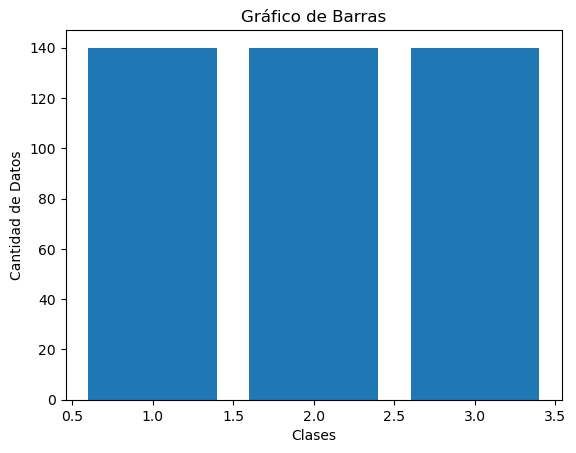

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes un array de datos numpy
datos = np.array([140, 140, 140])  # Puedes reemplazar estos valores con tus propios datos

# Clases correspondientes
clases = np.array([1, 2, 3])

# Crear el gráfico de barras
plt.bar(clases, datos)

# Añadir etiquetas y título
plt.xlabel('Clases')
plt.ylabel('Cantidad de Datos')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()


# Mostrar el gráfico
plt.show()


In [103]:
y_extended


array([3., 2., 2., 2., 2., 3., 3., 1., 3., 3., 3., 3., 2., 3., 3., 3., 3.,
       1., 3., 2., 2., 3., 3., 1., 2., 3., 2., 1., 2., 3., 3., 1., 1., 1.,
       2., 3., 2., 3., 2., 3., 2., 1., 2., 2., 3., 2., 1., 2., 2., 1., 3.,
       1., 3., 1., 1., 1., 1., 2., 2., 1., 3., 1., 1., 1., 2., 1., 2., 1.,
       3., 3., 1., 2., 1., 3., 2., 2., 1., 1., 2., 3., 1., 3., 3., 1., 2.,
       2., 2., 2., 3., 3., 1., 1., 3., 2., 1., 1., 2., 1., 1., 3., 3., 2.,
       3., 2., 3., 2., 2., 1., 3., 2., 1., 1., 3., 1., 1., 3., 2., 3., 2.,
       1., 2., 1., 1., 3., 3., 1., 1., 3., 3., 1., 2., 2., 3., 1., 2., 2.,
       3., 3., 3., 1., 2., 1., 1., 2., 3., 1., 1., 3., 1., 2., 2., 1., 1.,
       3., 1., 3., 2., 1., 3., 2., 2., 3., 3., 3., 2., 1., 3., 3., 3., 3.,
       2., 3., 2., 1., 3., 3., 3., 2., 1., 1., 2., 1., 2., 1., 2., 1., 3.,
       3., 3., 1., 2., 2., 3., 1., 3., 2., 2., 2., 3., 1., 2., 1., 1., 2.,
       1., 1., 3., 1., 3., 2., 1., 2., 3., 2., 2., 2., 1., 1., 2., 2., 3.,
       2., 2., 3., 1., 1.